<a href="https://colab.research.google.com/github/Maysk/data_science_alura/blob/main/deep_learning_previsao_keras/previsao_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Imports

In [22]:
#deep_learning_previsao_keras/previsao_notebook.ipynb
#deep_learning_previsao_com_keras
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import numpy as np


import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.figsize'] = (15,6)
mpl.rcParams['font.size'] = 21

##Carregando dataset

In [2]:
passageiros_raw = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/deeptime/aula1/Passageiros.csv')

In [3]:
passageiros_raw.head()

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


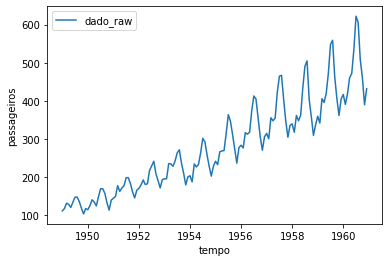

In [4]:
sns.lineplot(x='tempo', y='passageiros', data=passageiros_raw, label='dado_raw')

In [5]:
sc = StandardScaler();
sc.fit(passageiros_raw);

In [6]:
dataset_escalado = sc.transform(passageiros_raw)
x = dataset_escalado[:,0]
y = dataset_escalado[:,1]

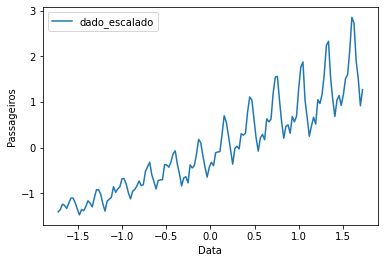

In [7]:
plt.ylabel('Passageiros')
plt.xlabel('Data')
sns.lineplot(x=x, y=y, label='dado_escalado')

In [8]:
tamanho_dataset = len(passageiros_raw)
tamanho_treino = int(tamanho_dataset * 0.9)
tamanho_teste = tamanho_dataset - tamanho_treino

In [9]:
xtreino = x[0:tamanho_treino]
ytreino = y[0:tamanho_treino]
xteste = x[tamanho_treino:tamanho_dataset]
yteste = y[tamanho_treino:tamanho_dataset]


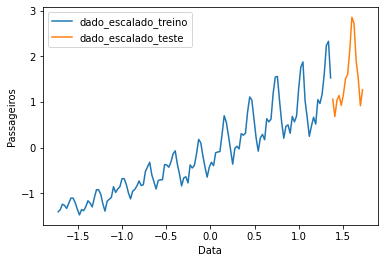

In [10]:
plt.ylabel('Passageiros')
plt.xlabel('Data')
sns.lineplot(x=xtreino, y=ytreino, label='dado_escalado_treino')
sns.lineplot(x=xteste, y=yteste, label='dado_escalado_teste')

##Criando Modelo

In [11]:
regressor = Sequential()
regressor.add(
    Dense(1, input_dim=1, kernel_initializer='Ones', use_bias=False, activation='linear')
)
regressor.compile(loss='mean_squared_error', optimizer='adam')

regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 1         
                                                                 
Total params: 1
Trainable params: 1
Non-trainable params: 0
_________________________________________________________________


In [12]:
regressor.fit(x=xtreino, y=ytreino)
previsoes = regressor.predict(xtreino)


5/5 [==============================] - 1s 4ms/step - loss: 0.1288


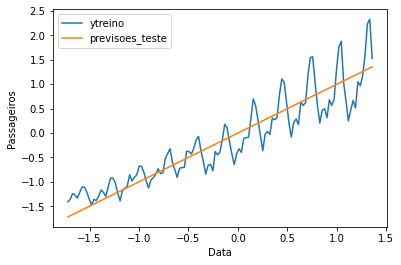

In [13]:
plt.ylabel('Passageiros')
plt.xlabel('Data')
sns.lineplot(x=xtreino, y=ytreino, label='ytreino')
sns.lineplot(x=xtreino, y=previsoes[:,0], label='previsoes_teste')

In [14]:
d = {'tempo': xtreino, 'passageiros': previsoes[:,0]}
resultados = pd.DataFrame(data=d)
resultados_transformado = pd.DataFrame(sc.inverse_transform(resultados))
resultados_transformado.columns = ['tempo', 'passageiros']

In [15]:
y_previsoes_teste = regressor.predict(x=xteste)
d_teste = {'tempo': xteste, 'passageiros': y_previsoes_teste[:,0]}
resultados_teste = pd.DataFrame(data=d_teste)
resultados_teste_transformado = pd.DataFrame(sc.inverse_transform(resultados_teste))
resultados_teste_transformado.columns = ['tempo', 'passageiros']

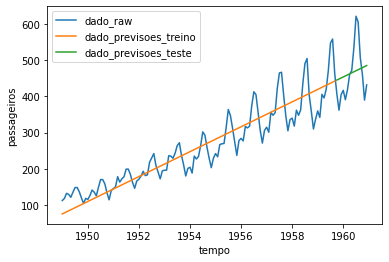

In [16]:
sns.lineplot(x='tempo', y='passageiros', data = passageiros_raw, label = 'dado_raw')
sns.lineplot(x='tempo', y='passageiros', data = resultados_transformado, label = 'dado_previsoes_treino')
sns.lineplot(x='tempo', y='passageiros', data = resultados_teste_transformado, label = 'dado_previsoes_teste')

In [17]:
regressor2 = Sequential()
regressor2.add(
    Dense(8, input_dim=1, kernel_initializer='random_uniform', activation='sigmoid', use_bias=False),
)
regressor2.add(
    Dense(16, kernel_initializer='random_uniform', activation='sigmoid', use_bias=False)
)
regressor2.add(
    Dense(1, kernel_initializer='random_uniform', activation='linear', use_bias=False)
)
regressor2.compile(loss='mean_squared_error', optimizer='adam')
regressor2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 8)                 8         
                                                                 
 dense_2 (Dense)             (None, 16)                128       
                                                                 
 dense_3 (Dense)             (None, 1)                 16        
                                                                 
Total params: 152
Trainable params: 152
Non-trainable params: 0
_________________________________________________________________


In [18]:
regressor2.fit(x=xtreino, y=ytreino, epochs=500, verbose='2');

Epoch 1/500
Epoch 2/500
Epoch 3/500
Epoch 4/500
Epoch 5/500
Epoch 6/500
Epoch 7/500
Epoch 8/500
Epoch 9/500
Epoch 10/500
Epoch 11/500
Epoch 12/500
Epoch 13/500
Epoch 14/500
Epoch 15/500
Epoch 16/500
Epoch 17/500
Epoch 18/500
Epoch 19/500
Epoch 20/500
Epoch 21/500
Epoch 22/500
Epoch 23/500
Epoch 24/500
Epoch 25/500
Epoch 26/500
Epoch 27/500
Epoch 28/500
Epoch 29/500
Epoch 30/500
Epoch 31/500
Epoch 32/500
Epoch 33/500
Epoch 34/500
Epoch 35/500
Epoch 36/500
Epoch 37/500
Epoch 38/500
Epoch 39/500
Epoch 40/500
Epoch 41/500
Epoch 42/500
Epoch 43/500
Epoch 44/500
Epoch 45/500
Epoch 46/500
Epoch 47/500
Epoch 48/500
Epoch 49/500
Epoch 50/500
Epoch 51/500
Epoch 52/500
Epoch 53/500
Epoch 54/500
Epoch 55/500
Epoch 56/500
Epoch 57/500
Epoch 58/500
Epoch 59/500
Epoch 60/500
Epoch 61/500
Epoch 62/500
Epoch 63/500
Epoch 64/500
Epoch 65/500
Epoch 66/500
Epoch 67/500
Epoch 68/500
Epoch 69/500
Epoch 70/500
Epoch 71/500
Epoch 72/500
Epoch 73/500
Epoch 74/500
Epoch 75/500
Epoch 76/500
Epoch 77/500
Epoch 78

In [19]:
y_previsoes = regressor2.predict(x=xtreino)
d = {'tempo': xtreino, 'passageiros': y_previsoes[:,0]}
resultados = pd.DataFrame(data=d)
resultados_transformado = pd.DataFrame(sc.inverse_transform(resultados))
resultados_transformado.columns = ['tempo', 'passageiros']

In [20]:
y_previsoes_teste = regressor2.predict(x=xteste)
d_teste = {'tempo': xteste, 'passageiros': y_previsoes_teste[:,0]}
resultados_teste = pd.DataFrame(data=d_teste)
resultados_teste_transformado = pd.DataFrame(sc.inverse_transform(resultados_teste))
resultados_teste_transformado.columns = ['tempo', 'passageiros']

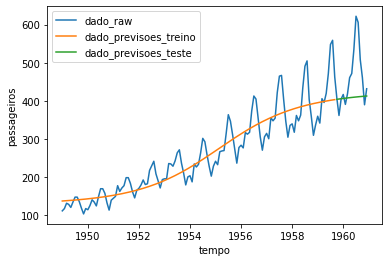

In [21]:
sns.lineplot(x='tempo', y='passageiros', data = passageiros_raw, label = 'dado_raw')
sns.lineplot(x='tempo', y='passageiros', data = resultados_transformado, label = 'dado_previsoes_treino')
sns.lineplot(x='tempo', y='passageiros', data = resultados_teste_transformado, label = 'dado_previsoes_teste')

## Gerar coluna com y-1

In [27]:
def separa_dados(vetor, n_passos):
  X_novo, y_novo = [],[]

  for i in range(n_passos, vetor.shape[0]):
    X_novo.append(list(vetor.loc[i-n_passos:i-1]))
    y_novo.append(vetor.loc[i])
  X_novo, y_novo = np.array(X_novo), np.array(y_novo)
  return X_novo, y_novo

In [46]:
vetor_treino = pd.DataFrame(ytreino)[0]
xtreino_novo, ytreino_novo = separa_dados(vetor_treino, 1)

vetor_teste = pd.DataFrame(yteste)[0]
xteste_novo, yteste_novo = separa_dados(vetor_teste, 1)

In [45]:
regressor3 = Sequential()

regressor3.add(
    Dense(8, input_dim=1, kernel_initializer='ones', activation='linear', use_bias=False),
)
regressor3.add(
    Dense(64, kernel_initializer='random_uniform', activation='sigmoid', use_bias=False)
)
regressor3.add(
    Dense(1, kernel_initializer='random_uniform', activation='linear', use_bias=False)
)

regressor3.compile(loss='mean_squared_error', optimizer='adam')


In [ ]:
regressor3.fit(xtreino_novo, ytreino_novo, epochs=100)

In [66]:
y_predict_novo = regressor3.predict(xtreino_novo)
y_predict_teste_novo = regressor3.predict(xteste_novo)
resultado = pd.DataFrame(y_predict_teste_novo)[0]

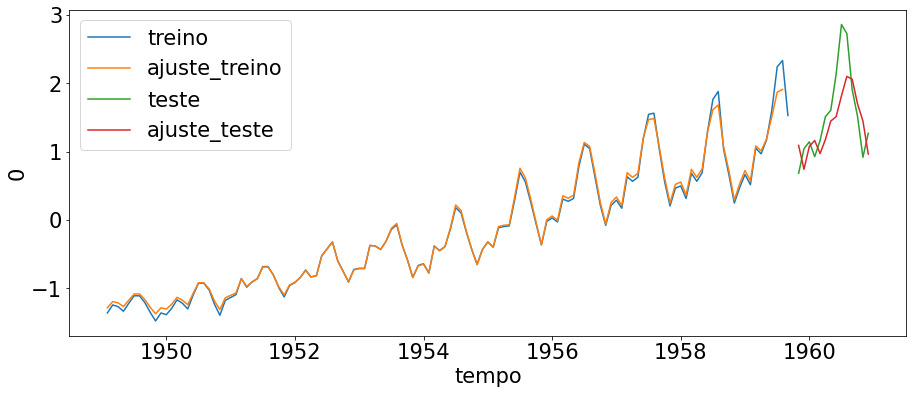

In [72]:
sns.lineplot(x='tempo', y=ytreino_novo, data=passageiros_raw[1:129], label='treino')
sns.lineplot(x='tempo', y=pd.DataFrame(y_predict_novo)[0], data=passageiros_raw[1:129], label='ajuste_treino')
sns.lineplot(x='tempo', y=yteste_novo, data=passageiros_raw[130:], label='teste')
sns.lineplot(x='tempo', y=resultado.values, data=passageiros_raw[130:], label='ajuste_teste')


### Vamos testar agora com uma janela de tempo de tamanho 4

In [82]:
vetor_treino = pd.DataFrame(ytreino)[0]
xtreino_novo, ytreino_novo = separa_dados(vetor_treino, 4)

vetor_teste = pd.DataFrame(yteste)[0]
xteste_novo, yteste_novo = separa_dados(vetor_teste, 4)

In [83]:
regressor4 = Sequential()

regressor4.add(
    Dense(8, input_dim=4, kernel_initializer='ones', activation='linear', use_bias=False),
)
regressor4.add(
    Dense(64, kernel_initializer='random_uniform', activation='sigmoid', use_bias=False)
)
regressor4.add(
    Dense(1, kernel_initializer='random_uniform', activation='linear', use_bias=False)
)

regressor4.compile(loss='mean_squared_error', optimizer='adam')

In [95]:
regressor4.fit(x=xtreino_novo, y=ytreino_novo, epochs=500)

Epoch 1/500
4/4 [==============================] - 0s 4ms/step - loss: 0.0882
Epoch 2/500
4/4 [==============================] - 0s 4ms/step - loss: 0.0884
Epoch 3/500
4/4 [==============================] - 0s 5ms/step - loss: 0.0877
Epoch 4/500
4/4 [==============================] - 0s 4ms/step - loss: 0.0873
Epoch 5/500
4/4 [==============================] - 0s 5ms/step - loss: 0.0871
Epoch 6/500
4/4 [==============================] - 0s 5ms/step - loss: 0.0873
Epoch 7/500
4/4 [==============================] - 0s 4ms/step - loss: 0.0872
Epoch 8/500
4/4 [==============================] - 0s 8ms/step - loss: 0.0871
Epoch 9/500
4/4 [==============================] - 0s 5ms/step - loss: 0.0862
Epoch 10/500
4/4 [==============================] - 0s 5ms/step - loss: 0.0862
Epoch 11/500
4/4 [==============================] - 0s 6ms/step - loss: 0.0867
Epoch 12/500
4/4 [==============================] - 0s 5ms/step - loss: 0.0858
Epoch 13/500
4/4 [==============================] - 0s 6ms/st

In [96]:
y_predict_novo = regressor4.predict(xtreino_novo)
y_predict_teste_novo = regressor4.predict(xteste_novo)

resultado_treino = pd.DataFrame(y_predict_novo)[0]
resultado_teste = pd.DataFrame(y_predict_teste_novo)[0]


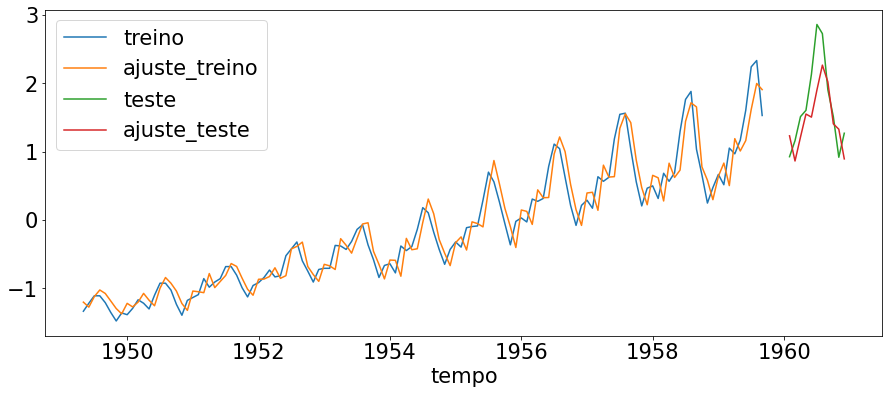

In [97]:
sns.lineplot(x='tempo', y=ytreino_novo, data=passageiros_raw[4:129], label='treino')
sns.lineplot(x='tempo', y=resultado_treino.values, data=passageiros_raw[4:129], label='ajuste_treino')
sns.lineplot(x='tempo', y=yteste_novo, data=passageiros_raw[133:], label='teste')
sns.lineplot(x='tempo', y=resultado_teste.values, data=passageiros_raw[133:], label='ajuste_teste')
